## Name: Yashaswini Joshi
## Unique Name: yjoshi

### 2.1 Part 1: Exploratory Social Network Analysis

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install texlive-xetex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement texlive-xetex (from versions: none)
ERROR: No matching distribution found for texlive-xetex


In [3]:
# load all libraries
%matplotlib inline
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots

In [4]:
df = pd.read_csv("amazonNetwork.csv")
df

,FromNodeId,ToNodeId
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11
...,...,...
10836,2646,980
10837,2647,881
10838,2647,976
10839,2647,978


### Load the directed network graph (G) from the file amazonNetwork.csv.

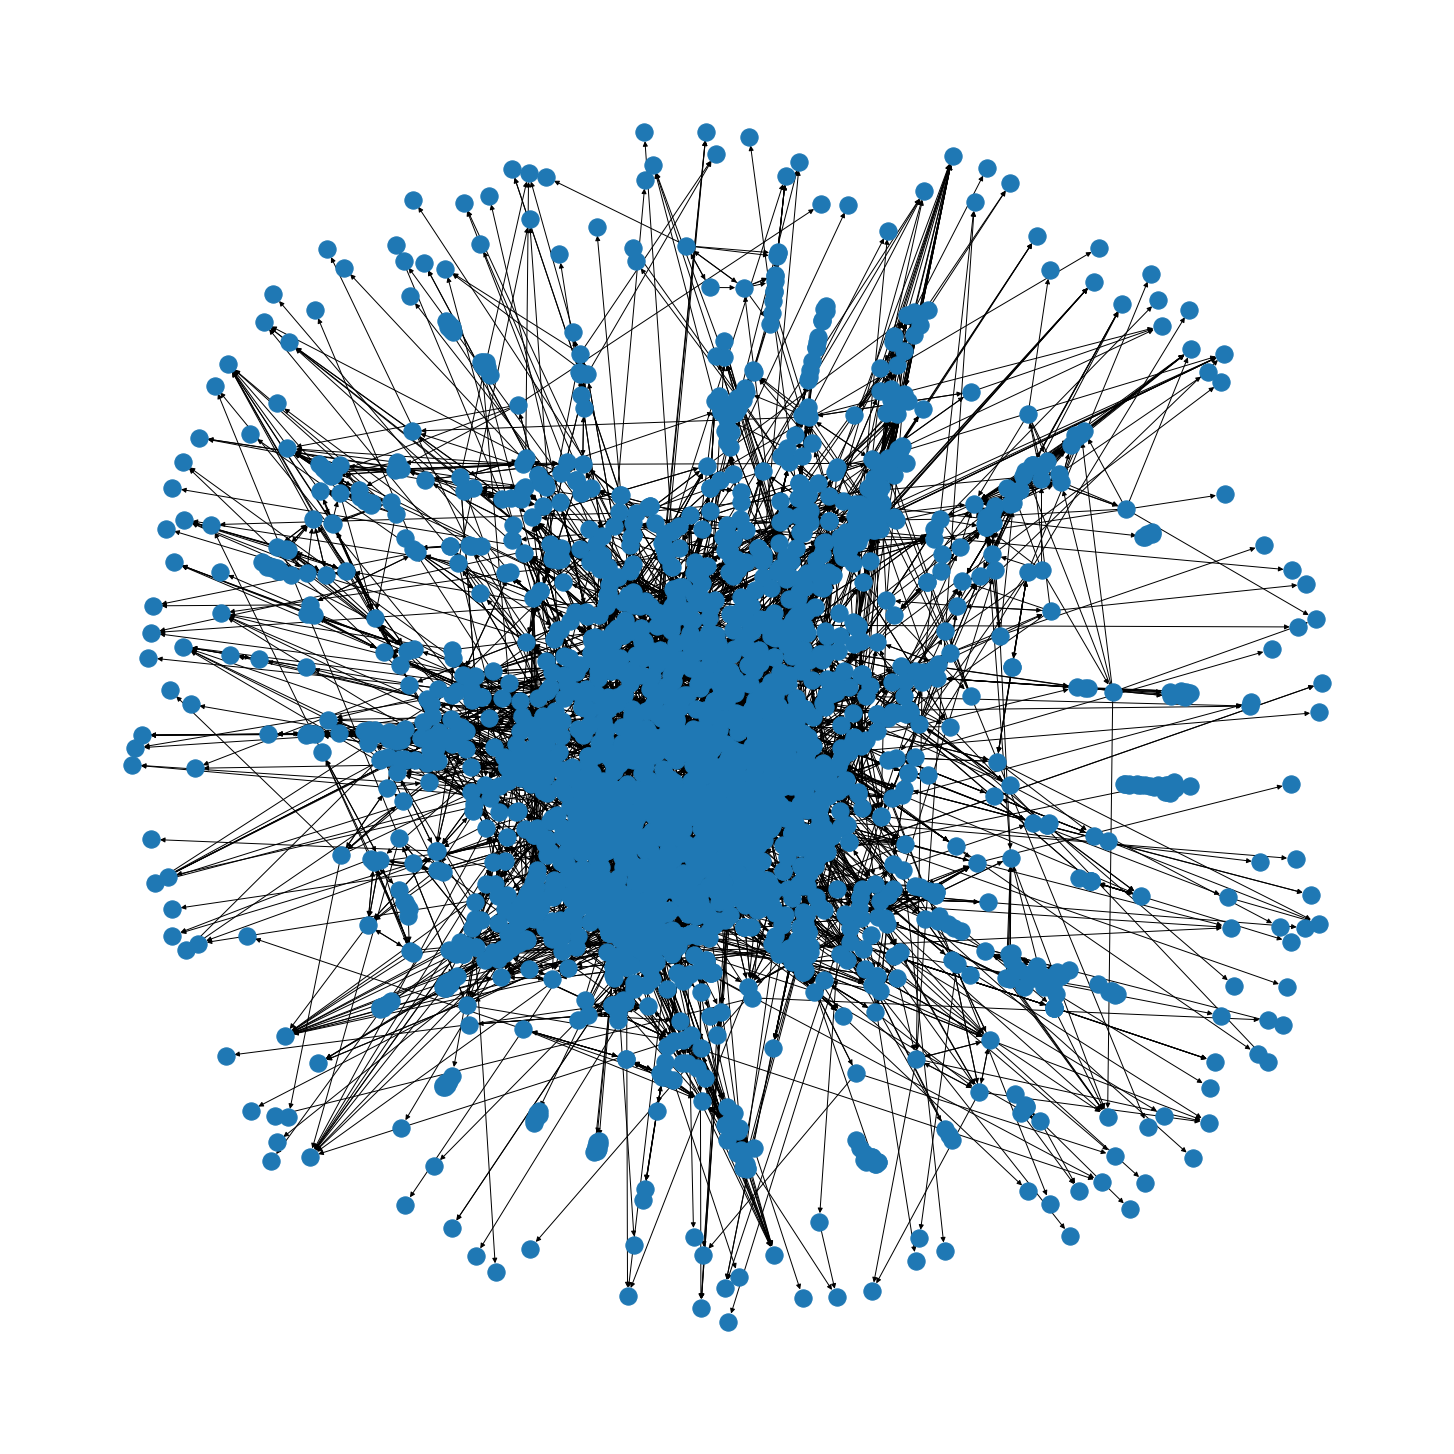

In [5]:
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId',create_using=nx.DiGraph()) 
plt.rcParams['figure.figsize'] = 20, 20

nx.draw(G)

### How many items are present in the network and how many co-purchases happened?

In [6]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 2647
Number of edges: 10841
Average in degree:   4.0956
Average out degree:   4.0956


The number of items present in the network are: 2647

The number of co-purchases happened in the network are: 10841

### Compute the average shortest distance between the nodes in graph G. Explain your results briefly.

In [7]:
print("The average shortest distance between the nodes in graph G is: ", nx.average_shortest_path_length(G))

The average shortest distance between the nodes in graph G is:  9.592795477759587


#### Explanation: 
Average shortest distance is a concept in network topology that is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network [1]. Here, the average shortest path length is about 9.59 degrees.

### Compute the transitivity and the average clustering coefficient of the network graph G.

In [8]:
print("The transitivity of the network graph G is: ",nx.transitivity(G))

The transitivity of the network graph G is:  0.4339169154480595


In [9]:
print("The average clustering coefficient of the network graph G is: ",nx.average_clustering(G))

The average clustering coefficient of the network graph G is:  0.4086089178720651


#### Explanation: 
Transitivity is the overall probability for the network to have adjacent nodes interconnected, thus revealing the existence of tightly connected communities (or clusters, subgroups, cliques) [2]. Here, the transitivity of the network is 0.4339.

Clustering coefficient is a property of a node in a network. Roughly speaking it tells how well connected the neighborhood of the node is [3]. Here, the average clustering coefficient of the network is about 0.4, which means the neighbourhood is not fully connected. So we can say that items are not connected.

### Apply the PageRank algorithm to network G with damping value 0.5 and find the 10 nodes with the highest PageRank. Explain your findings briefly.

In [10]:
from operator import itemgetter
pr = nx.pagerank(G, alpha=0.5)
res = dict(sorted(pr.items(), key = itemgetter(1), reverse = True)[:10]) 
res

{8: 0.003624781216941063,
 481: 0.0024342886090742634,
 33: 0.0022971136999660794,
 18: 0.0021025878370248222,
 23: 0.002078673946680066,
 30: 0.0018816442748514997,
 346: 0.001862599762402043,
 99: 0.0018196338585717926,
 93: 0.00179201768671689,
 21: 0.0016587580041174607}

#### Explanation: 

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links [4]. Here, the 10 nodes with the highest PageRank are 8, 481, 33, 18, 23, 30, 346, 99, 93, 21. So these nodes represent the top 10 items searched in the amazon network. 

### References
1. https://www.hindawi.com/journals/jam/2013/865643/
2. https://transportgeography.org/?page_id=6171
3. http://www.wandora.org/wiki/Clustering_coefficient
4. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html